### 1.  IMPORTING NECESSARY LIBRARIES.

In [195]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
import time
import seaborn as sns
import matplotlib.pyplot as plt

##### READING THE DATASET.

In [196]:
movies=pd.read_csv("IMDB Dataset.csv")

### 2. CLEANING THE DATASET.

##### PRINTING FIRST FIVE ROWS.

In [197]:
movies.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


##### PRINTING LAST FIVE ROWS.

In [198]:
movies.tail(5)

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


##### PRINTING RANDOM FIVE ROWS.

In [199]:
movies.sample(5)

,review,sentiment
16001,I'm an animator myself and an all around buff ...,negative
35129,"Made after QUARTET was, TRIO continued the qua...",positive
31056,"Why, oh why, is this trash considered a classi...",negative
15111,"Douglas Sirk's inaugural ""women's-picture"" wee...",negative
24821,I saw this at the Edinburgh Film Festival. It ...,negative


##### PRINTING BASIC DETAILS ABOUT DATA.

In [200]:
# NUMBER OF ROWS AND COLUMNS IN OUR DATASET.
movies.shape

(50000, 2)

In [201]:
# GENREAL INFORMATION ABOUT DATATYPE,NULL VALUES,MEMORY CONSUMPTION.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


##### FINDING DUPLICATED ROWS IN OUR DATA.

In [202]:
#NUMBER OF DUPLICATED ROWS IN OUR DATA.
movies.duplicated().sum()

418

In [203]:
#DROPPING THE DUPLICATED ROWS.
movies=movies.drop_duplicates()

In [204]:
#PREVIEW OF DATA
movies

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


##### WORKING WITH 5000 ROWS ONLY.

In [205]:
movies=movies.iloc[:5000].copy()

##### CONVERTING 'REVIEW' COLUMN IN LOWER CASE.

In [206]:
movies.loc[movies.index,'review']=movies['review'].str.lower()

##### REMOVING LEADING AND TRAILING WHITESPAECES FROM THE "REVIEW" COLUMN.

In [207]:
movies.loc[movies.index,'review']=movies['review'].str.strip()

##### PREVIEW OF "REVIEW" COLUMN.
1. CONTAINS HTML TAG ('<br //><br //>')
2. CONTAINS ABBREVATION (film\'s,doesn't,you\'ll)
3. CONTAINS PUNCTUATIONS OR SPECIAL CHARACTER.
4. CONTAINS URL.

In [208]:
movies['review'].sample(1).values

array(['brilliant thriller, deserving far more fame, mitchum and ryan are awesome in their starring roles, as is the entire supporting cast. a truly gripping film noir featuring some wonderfully images and some great dialogue, at the heart of it all is a strong message of tolerance and understanding. based on a novel concerning homophobia, this movie attacks post-war anti-emitism, and all intolerance and hatred, with considerable power. though parts may seem a little preachy to modern audiences, it still has the power to shock, and works very well as a thriller in its own right. a credit to all involved.'],
      dtype=object)

##### REMOVING HTML TAGS FROM THE "REVIEW " COLUMN

In [209]:
movies.loc[movies.index,'review']=movies['review'].str.replace(r'<[^>]+>','',regex=True)


##### REMOVING URLS FROM THE "REVIEW" COLUMN

In [210]:
# REVIEW CONTAINING URL.
movies[movies['review'].str.contains(r'https?://\S+|www\.\S+')]['review'].sample(1).values

array(["the basic plot of 'marigold' boasts of a romantic comedy wherein the film industry is kept as a backdrop. an american actress marigold, played by ali carter gets stuck in india. worse that, she is out of money. she then decides to play a small role in a bollywood musical, so that she can earn enough money to get back to her nation. here she gets to meet indian choreographer prem, played by salman khan. basically, the movie fails at the script level. just by calling a film a hollywood venture doesn't guarantee quality cinema. marigold stands out as the best example. the art direction is weak and outdated. musically, marigold turns out to be a dud. shankar-ehsaan-loy's is far from being acknowledged as a decent hear. actingwise, salman delivers of his most amateurish performances till date. ali larter is good and has immense screen presence. performance wise too, she is good.one can also find good reviews regarding this movie at http://www.comingsoon.net/films.php?id=36310"],
   

In [211]:
#REMOVING URL
movies.loc[movies.index,'review']=movies['review'].str.replace(r'https?://\S+|www\.\S+','',regex=True)

##### EXAPNDING ABBREVATION IN "REVIEW" COLUMN.

In [212]:
# expanding abbvr

# expand 

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [213]:
# EXPANDING ABBREVATION.
movies['review']=movies['review'].apply(remove_abb)

##### SPELLING CORRECTION USING TEXTBLOB LIBRARY.

In [214]:
# THESE CODE WILL TAKE TOO MUCH TIME
def spell_correction(sen):
    return TextBlob(sen).correct().string

# movies.loc[movies.index,'review']=movies['review'].apply(spell_correction)

##### REMOVING PUNCTUATIONS OR SPECIAL CHARACTERS.

In [215]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [216]:
movies.loc[movies.index,'review']=movies['review'].str.replace(r'[^\w\s]','',regex=True)

In [217]:
movies['review'].sample(1).values

array(['not a movie for everyone but this movie is in my top 10 i am a lover of black comedy with a cast including richard dreyfus vic jeff goldblum mick larry bishop nick and gabriel byrne ben brass balls london in the leads the lines cannot help but be dry the supporting cast is nearly dead center counting the minor flaws in the movie ellen barkins makeup gave her face has a washed out look there were a couple of gimme cameos by joey bishop and richard pryor that served no purpose and michael j pollards screen time was too short over all the cast was just incredible without egos to wreck a fine script if you have seen larry bishops writer director film underworld a dark crime flick you will enjoy this one his next outing writer director actor is hell ride with michael madsen and quentin tarantino'],
      dtype=object)

##### REMOVING MORE THAN ONE WHITESPACES FROM THE SENTENCES.

In [218]:
movies.loc[movies.index,'review']=movies['review'].str.replace(r'\s+',' ',regex=True)

In [219]:
movies.loc[movies.index,'review']=movies['review'].str.lower()

### 3. PREPROCESSING OF CLEANED DATA.

##### PERFORMING TOKENIZATION ON 'REVIEW' COLUMN.

In [220]:
movies['tokenized_review']=movies['review'].apply(word_tokenize)

In [221]:
# PREVIEW OF THE DATA
movies

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."
...,...,...,...
4998,i rented this movie after hearing chris gore s...,negative,"[i, rented, this, movie, after, hearing, chris..."
4999,this was a big disappointment for me i think t...,negative,"[this, was, a, big, disappointment, for, me, i..."
5000,not a movie for everyone but this movie is in ...,positive,"[not, a, movie, for, everyone, but, this, movi..."
5001,this film is not your typical hollywood fare t...,positive,"[this, film, is, not, your, typical, hollywood..."


##### REMOVING STOPWORDS FROM THE 'REVIEW' COLUMN

In [222]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [224]:
#REMOVE STOPWORDS
def remove_stopwords(text):
    L=[]
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
    return L

movies['tokenized_review']=movies['tokenized_review'].apply(remove_stopwords)

##### MAKING NEW COLUMN BY JOINING "TOKENIZED_REVIEW" COLUMN

In [225]:
movies['latest_review']=movies['tokenized_review'].apply(lambda x:" ".join(x))

### 4. PERFORMING FEATURE ENGINEERING

##### MAKING NEW COLUMN WHICH HAVE LENGTH OF CHARACTER.

In [226]:
movies['char_lenght_review']=movies['latest_review'].str.len()

##### MAKING NEW COLUMN WHICH HAVE LENGTH OF WORD.

In [227]:
movies['word_count']=movies['tokenized_review'].apply(len)

### 5. PERFORMING EDA

##### VISUALIZATION

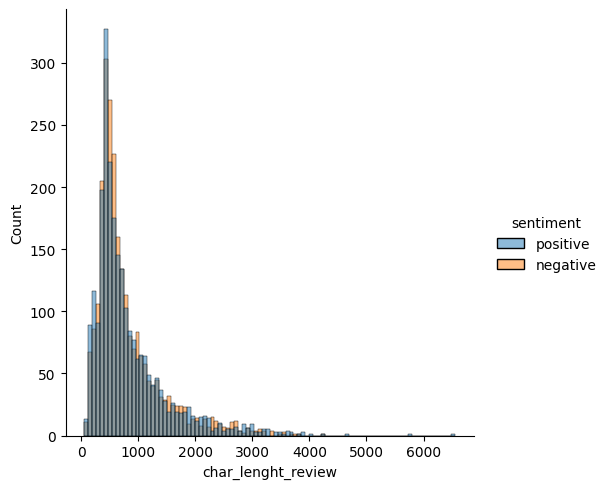

In [228]:
# CHAR LENGTH
sns.displot(data=movies,x='char_lenght_review',hue='sentiment')
plt.show()

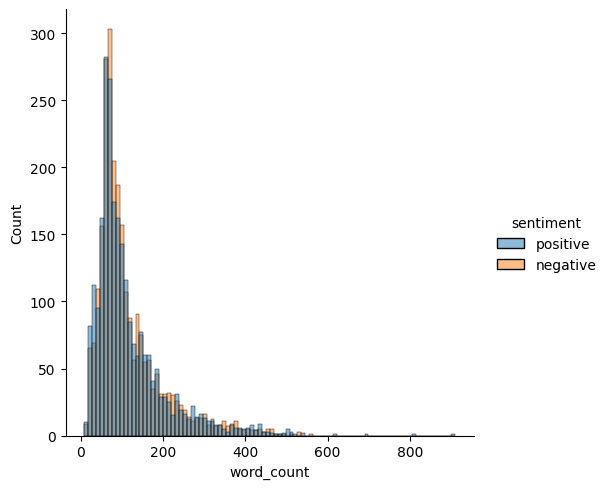

In [229]:
# WORD COUNT
sns.displot(data=movies,x='word_count',hue='sentiment')
plt.show()

##### N-GRAMS

In [230]:
pd.Series(ngrams(movies['tokenized_review'].sum(),2)).value_counts()

(ever, seen)           236
(special, effects)     215
(even, though)         195
(looks, like)          171
(one, best)            170
                      ... 
(blink, nudged)          1
(chauffeurs, blink)      1
(dead, chauffeurs)       1
(cars, dead)             1
(put, sock)              1
Name: count, Length: 455272, dtype: int64

In [231]:
pd.Series(ngrams(movies['tokenized_review'].sum(),3)).value_counts()

(worst, movie, ever)        56
(movie, ever, seen)         47
(movies, ever, seen)        29
(one, worst, movies)        29
(worst, movies, ever)       28
                            ..
(hostile, indians, one)      1
(ever, hostile, indians)     1
(trapped, ever, hostile)     1
(feel, trapped, ever)        1
(1995, put, sock)            1
Name: count, Length: 578013, dtype: int64

##### WORDCLOUD

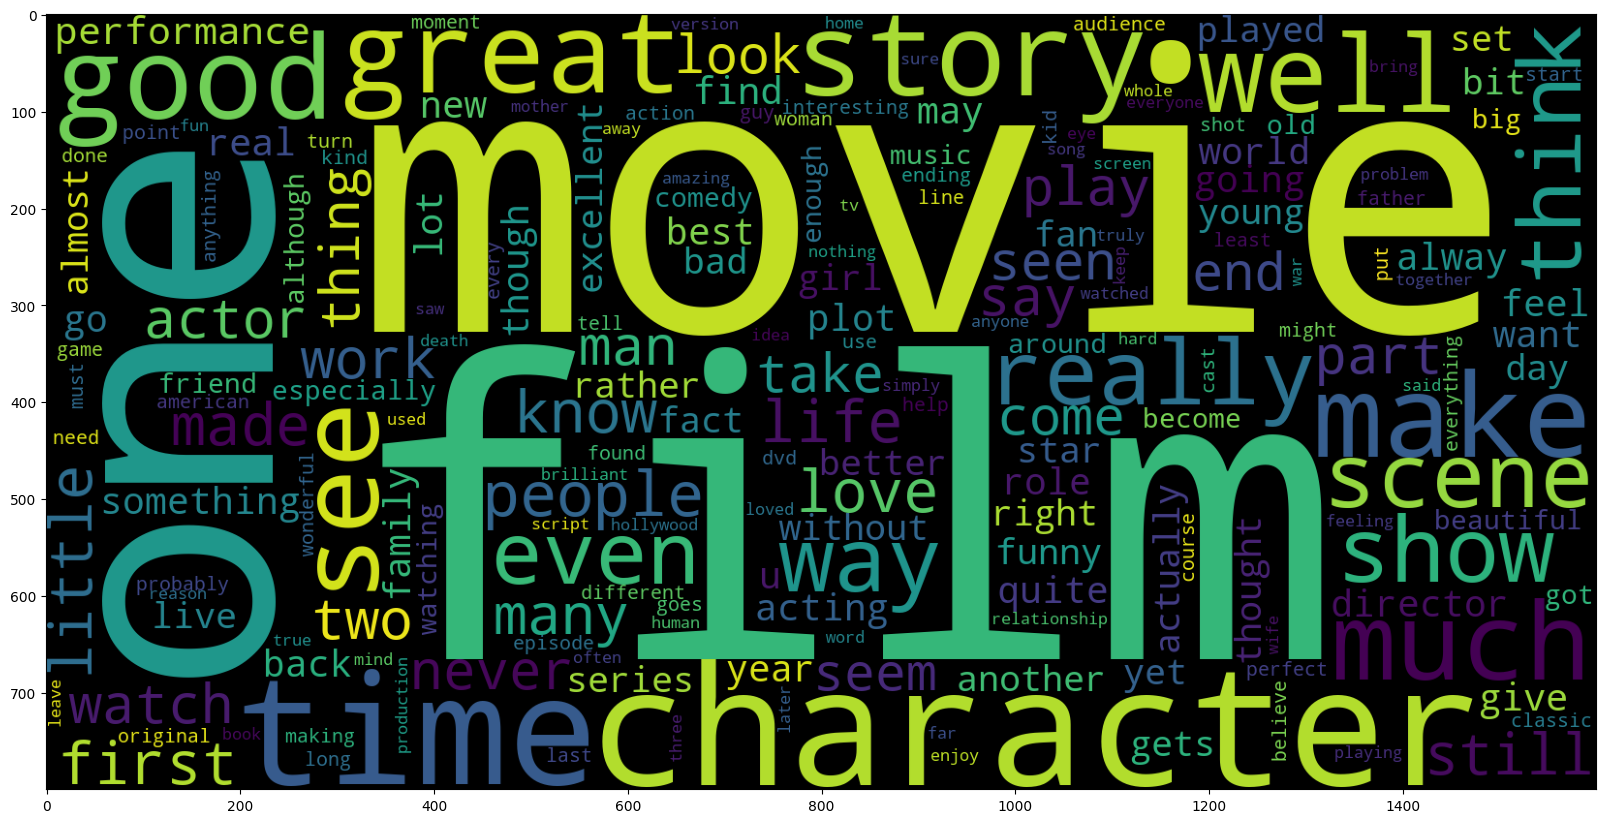

In [232]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(movies[movies['sentiment'] == 'positive']['latest_review']))
plt.imshow(wc)

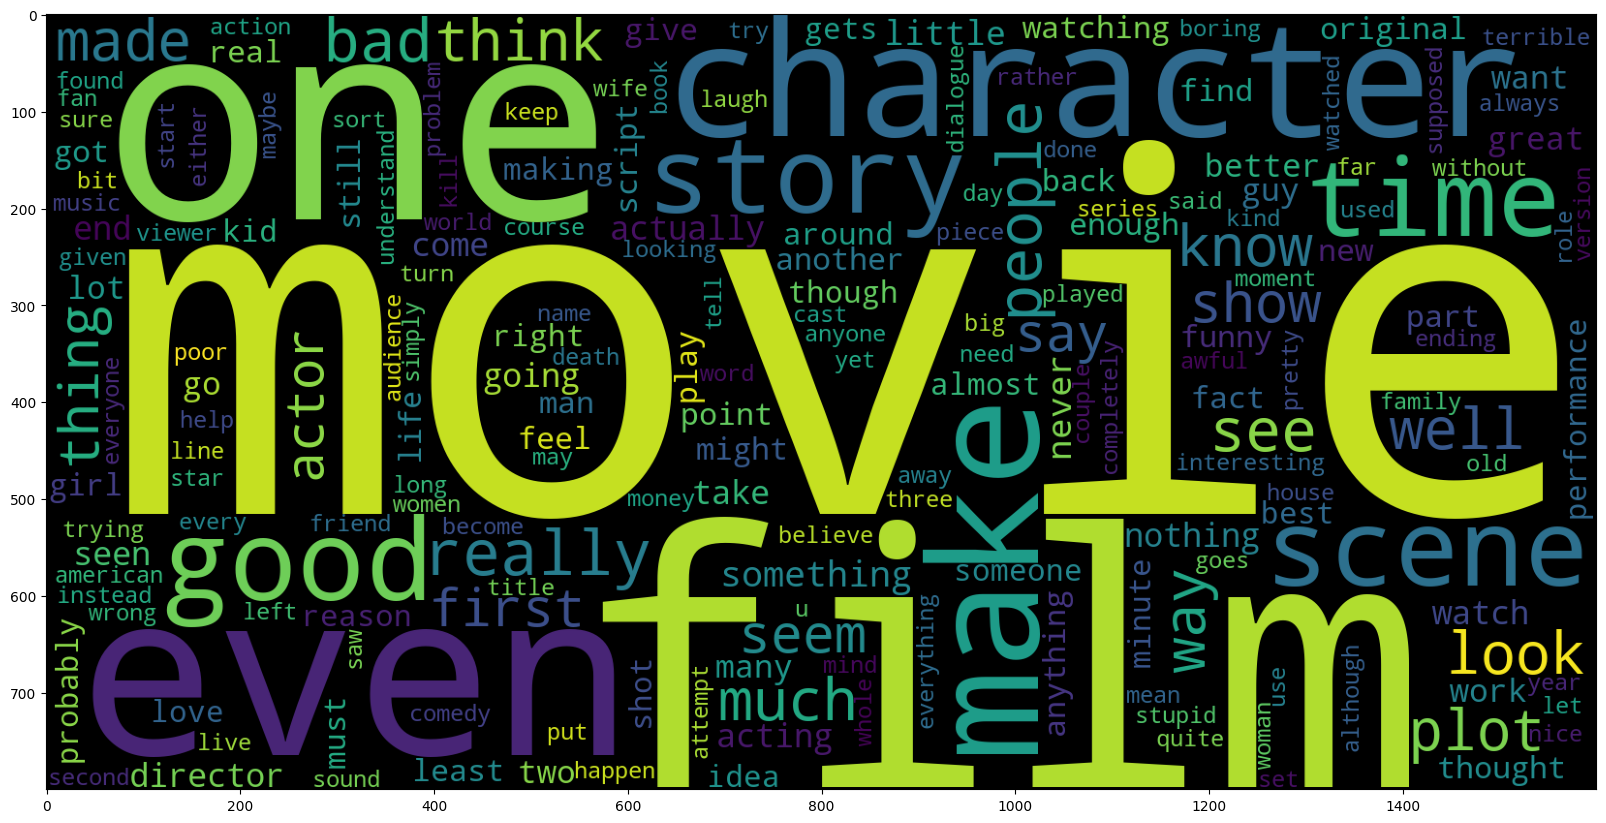

In [233]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(movies[movies['sentiment'] == 'negative']['latest_review']))
plt.imshow(wc)

In [234]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(movies['latest_review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns =count_vectorizer.get_feature_names_out())

In [235]:
bag_of_words

,10,10 10,10 minutes,10 years,100,1010,11,110,12,13,...,young girl,young man,young people,young woman,younger,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

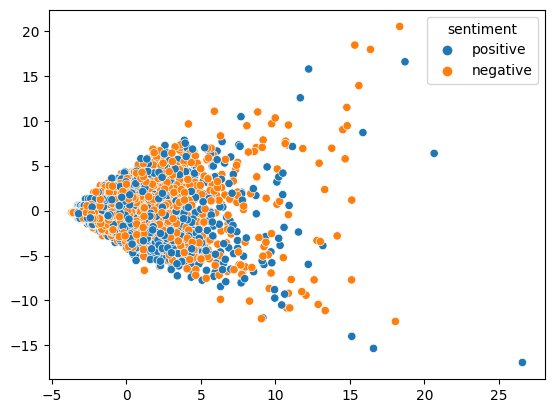

In [237]:
sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=movies['sentiment'])
plt.show()